In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('titanic.csv')

# UNDERSTANDING YOUR DATA

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# CONCLUSION AFTER SEEING THE DATA

# 

# CLEANING DATA

In [9]:
titanic_copy = titanic

1. Quality issues

1. Survived col should be in category format [v]
2. Pclass col should be in category form [v]
3. sex col should be in category format [V]
4. Age col should be in int format [V]
5. Embarked should be in category format [v]
6. Age col contains 177 missing values [c]
7. Cabin col contains 687 missing values [c]
8. Embarked col contains 2 missing values [c]


2. Tideness issues

In [10]:
# There is no need for the PassengerID col

# SOLVING ISSUES

In [11]:
# droping the Cabin col

In [12]:
titanic = titanic.drop(columns=['Cabin'])

In [13]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [14]:
#filling the Age col by mean()

In [15]:
titanic = titanic.fillna(titanic['Age'].mean())

In [16]:
titanic['Age'].isnull().sum()

0

In [17]:
#filling Embarked col by taking out the most denser area and extracting the 2 numeric value

In [18]:
titanic['Embarked'] = titanic['Embarked'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()

In [19]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [21]:
titanic['Embarked'].isnull().sum()

0

In [22]:
titanic = titanic.drop(columns=['PassengerId'])

In [23]:
titanic.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [24]:
#changing the datatype of Survived, Pclass, Sex, Age and Embarked columns

In [25]:
titanic['Survived'] = titanic['Survived'].astype('category')
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Age'] = titanic['Age'].astype('int')
titanic['Embarked'] = titanic['Embarked'].astype('category')


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    int32   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(2), object(2)
memory usage: 42.4+ KB


# UNIVARIATE ANALYSIS

Survived

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

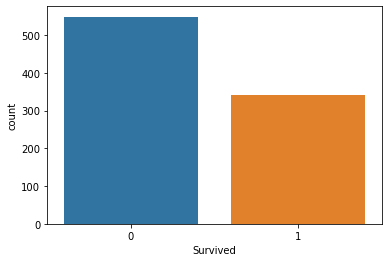

In [27]:
sns.countplot(titanic['Survived'])

In [28]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
deaths = ((549/891)*100)
print("deaths percentage = ",deaths)
alive = ((349/891)*100)
print("alive percentage = ",alive)

deaths percentage =  61.61616161616161
alive percentage =  39.16947250280584


<AxesSubplot:ylabel='Survived'>

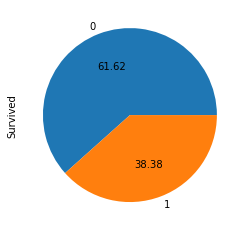

In [30]:
titanic['Survived'].value_counts().plot(kind='pie', autopct='%0.2f')

Age

(array([ 50.,  33., 164., 358., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

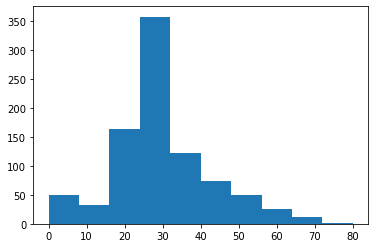

In [31]:
plt.hist(titanic['Age'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

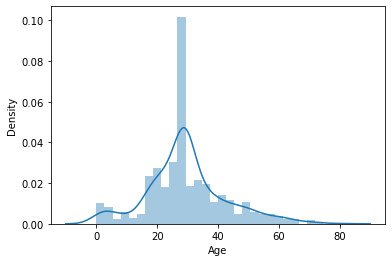

In [32]:
sns.distplot(titanic['Age'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

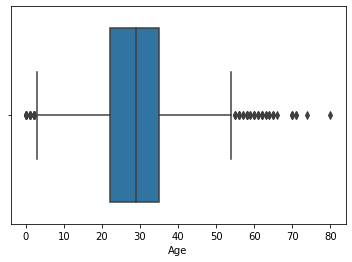

In [33]:
sns.boxplot('Age', data=titanic)

In [34]:
titanic['Age'].median()

29.0

In [35]:
titanic['Age'].mean()

29.544332210998878

In [36]:
print(np.percentile(titanic['Age'], 25))
print(np.percentile(titanic['Age'], 50))
print(np.percentile(titanic['Age'], 75))
print(np.percentile(titanic['Age'], 100))

22.0
29.0
35.0
80.0


In [37]:
IQR = np.percentile(titanic['Age'], 75) - np.percentile(titanic['Age'], 25)
IQR

13.0

In [38]:
minimum = np.percentile(titanic['Age'], 25) - (1.5*IQR)
print("The minimum boxplot shows ",minimum)

maximum = np.percentile(titanic['Age'], 75) + (1.5*IQR)
print("The maximum boxplot shows ",maximum)


The minimum boxplot shows  2.5
The maximum boxplot shows  54.5


In [39]:
(titanic['Age'].value_counts()/891)*100

29    22.109989
24     3.479237
22     3.030303
28     3.030303
30     3.030303
        ...    
66     0.112233
53     0.112233
80     0.112233
12     0.112233
74     0.112233
Name: Age, Length: 71, dtype: float64

In [40]:
print("The people of age in between 22 to 35 are ", titanic[(titanic['Age']>22) & (titanic['Age']<35)].shape[0])
print("The people of age in between 40 to 55 ",titanic[(titanic['Age']>40) & (titanic['Age']<55)].shape[0]) 
print("The people of age more than 55 to 80 ",titanic[(titanic['Age']>55) & (titanic['Age']==80)].shape[0])

The people of age in between 22 to 35 are  425
The people of age in between 40 to 55  106
The people of age more than 55 to 80  1


In [41]:
titanic['Age'].skew()

0.45956263424701577

In [42]:
titanic['Age'].kurtosis()

0.9865867453652877

Pclass

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

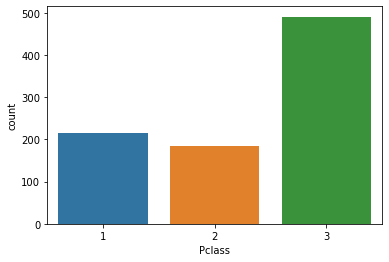

In [43]:
sns.countplot(titanic['Pclass'])

In [44]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [45]:
(titanic['Pclass'].value_counts()/891)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

<AxesSubplot:ylabel='Pclass'>

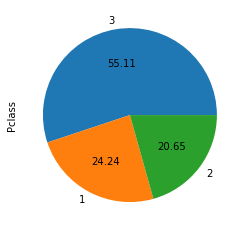

In [46]:
titanic['Pclass'].value_counts().plot(kind='pie', autopct='%0.2f')

Embarked

In [47]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:ylabel='Embarked'>

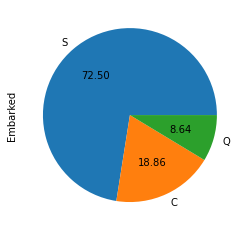

In [48]:
titanic['Embarked'].value_counts().plot(kind='pie', autopct='%0.2f')

Sex

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

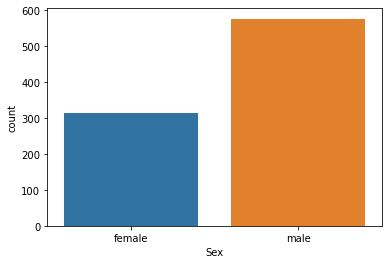

In [49]:
sns.countplot(titanic['Sex'])

In [50]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

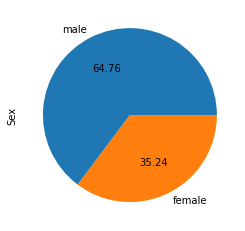

In [51]:
titanic['Sex'].value_counts().plot(kind='pie', autopct='%0.2f')

Embarked

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

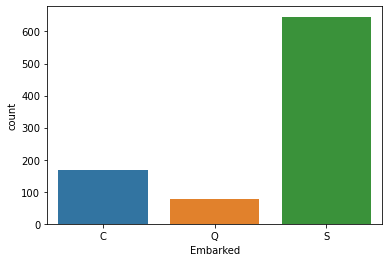

In [52]:
sns.countplot(titanic['Embarked'])

Fare

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

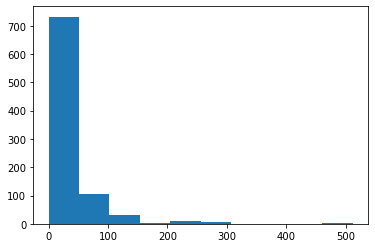

In [53]:
plt.hist(titanic['Fare'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

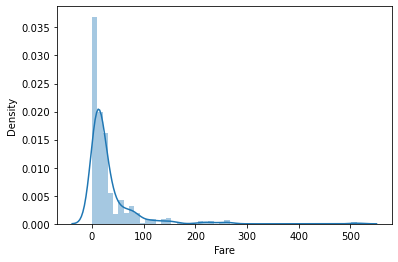

In [54]:
sns.distplot(titanic['Fare'])

In [55]:
print("People in fare between 200 to 300 are ", titanic[(titanic['Fare']>200) & (titanic['Fare']<300)].shape[0])
print("People in fare more than 300 are ", titanic[titanic['Fare']>300].shape[0])

People in fare between 200 to 300 are  17
People in fare more than 300 are  3


In [56]:
titanic['Fare'].mean()

32.2042079685746

In [57]:
titanic['Fare'].skew()

4.787316519674893

# CONCLUSION OF UNIVARIATE ANALYSIS

# MULTIVARIATE ANALYSIS

Survived and age - categorical and numrical col

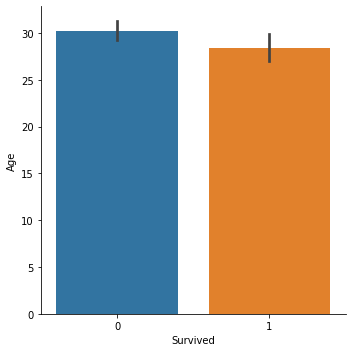

In [58]:
# barplot
sns.catplot(x = 'Survived', y = 'Age' , kind='bar', data=titanic)

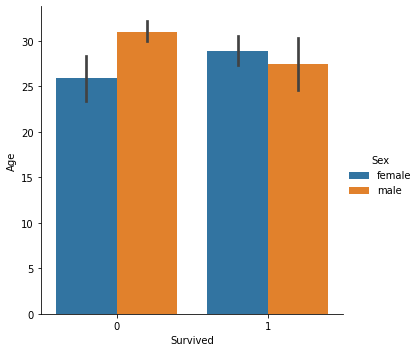

In [59]:
sns.catplot(x='Survived', y='Age', hue='Sex', kind='bar', data=titanic)

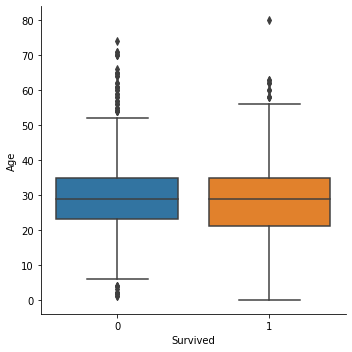

In [60]:
# boxplot
sns.catplot(x = 'Survived', y = 'Age' , kind='box', data=titanic)

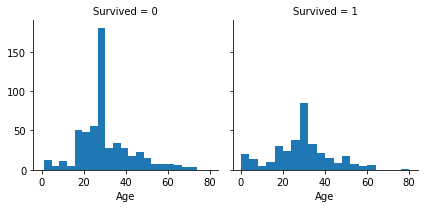

In [61]:
sns.FacetGrid(titanic, col='Survived').map(plt.hist, 'Age', bins=20)

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

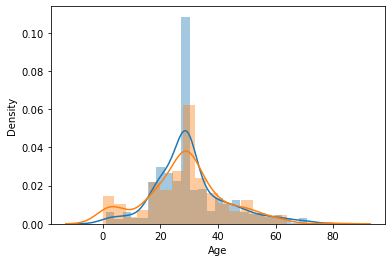

In [62]:
sns.distplot(titanic[titanic['Survived']==0]['Age'])
sns.distplot(titanic[titanic['Survived']==1]['Age'])

Survived and Pclass

In [63]:
p = pd.crosstab(titanic['Survived'], titanic['Pclass'])
p

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Survived'>

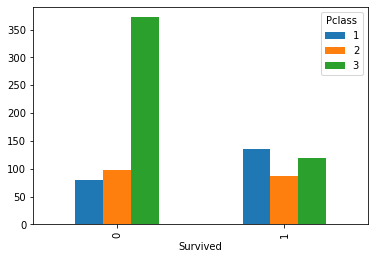

In [64]:
p.plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

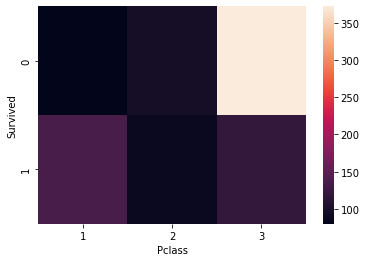

In [65]:
sns.heatmap(p)

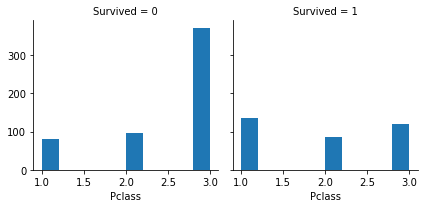

In [66]:
sns.FacetGrid(titanic, col='Survived').map(plt.hist, 'Pclass')

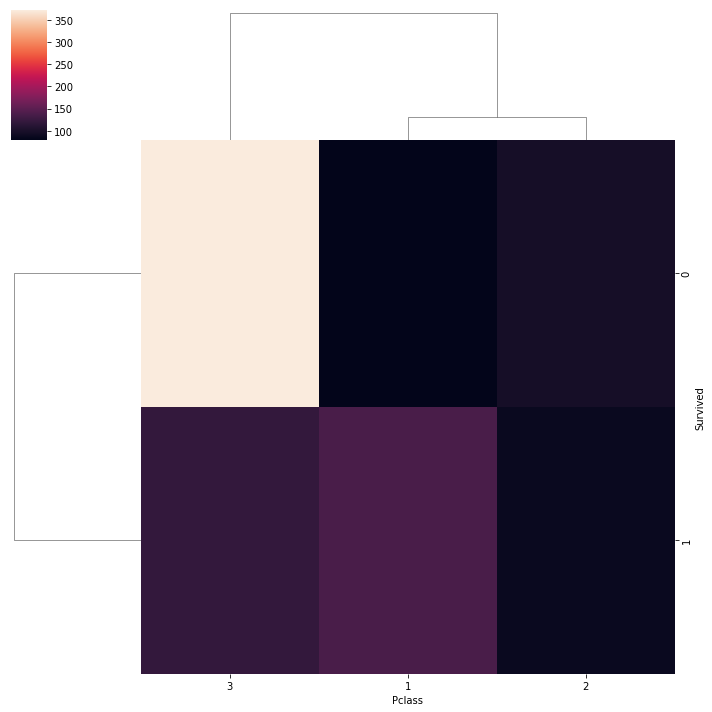

In [67]:
sns.clustermap(p)

Survived and sex

In [68]:
# barplot
d = pd.crosstab(titanic['Survived'], titanic['Sex'])

In [69]:
d

Sex,female,male
Survived,,
0,81,468
1,233,109


In [70]:
(titanic['Sex']=='male').sum()

577

In [71]:
(titanic['Sex']=='female').sum()

314

In [72]:
dfemale = ((81/314)*100)
print("The deaths of females in percentage ",dfemale)

sfemale = ((233/314)*100)
print("The survived females in percentage ",sfemale)

The deaths of females in percentage  25.796178343949045
The survived females in percentage  74.20382165605095


In [73]:
dmale = ((468/577)*100)
print("The deaths of males in percentage ",dmale)

smale = ((109/577)*100)
print("The survived males in percentage ",smale)

The deaths of males in percentage  81.10918544194108
The survived males in percentage  18.890814558058924


<AxesSubplot:xlabel='Survived'>

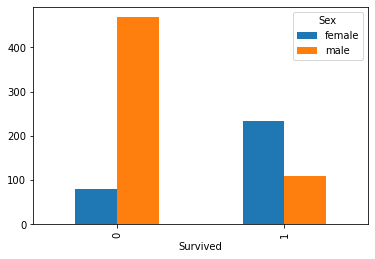

In [74]:
d.plot(kind='bar')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

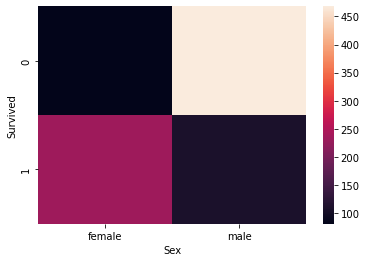

In [75]:
sns.heatmap(d)

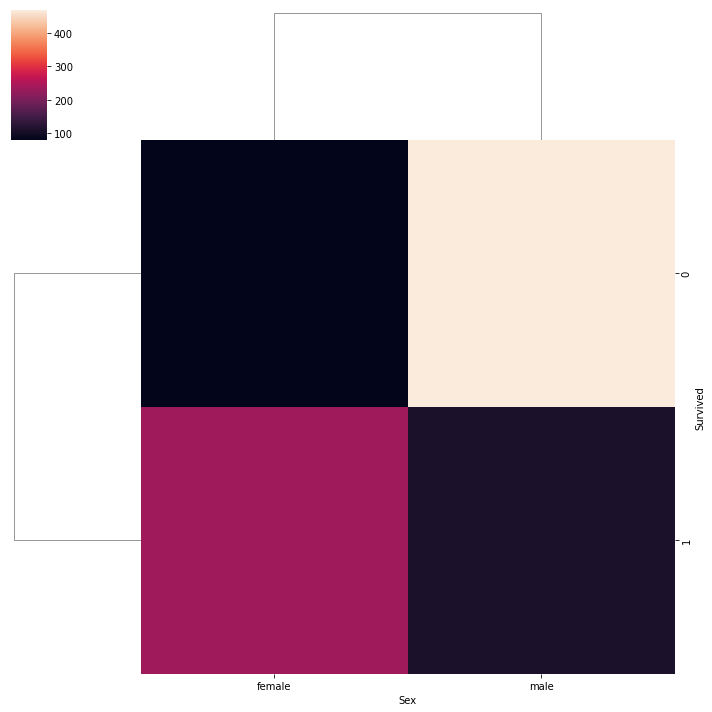

In [76]:
sns.clustermap(d)

Survived and Embarked

In [77]:
table = pd.crosstab(titanic['Survived'], titanic['Embarked'])

In [78]:
table

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


<AxesSubplot:xlabel='Survived'>

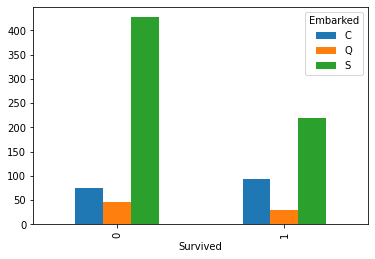

In [79]:
table.plot(kind='bar')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

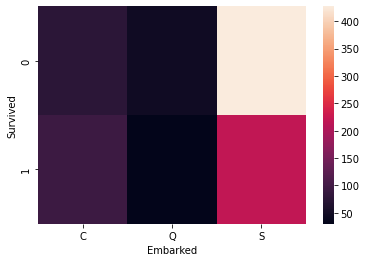

In [80]:
sns.heatmap(table)

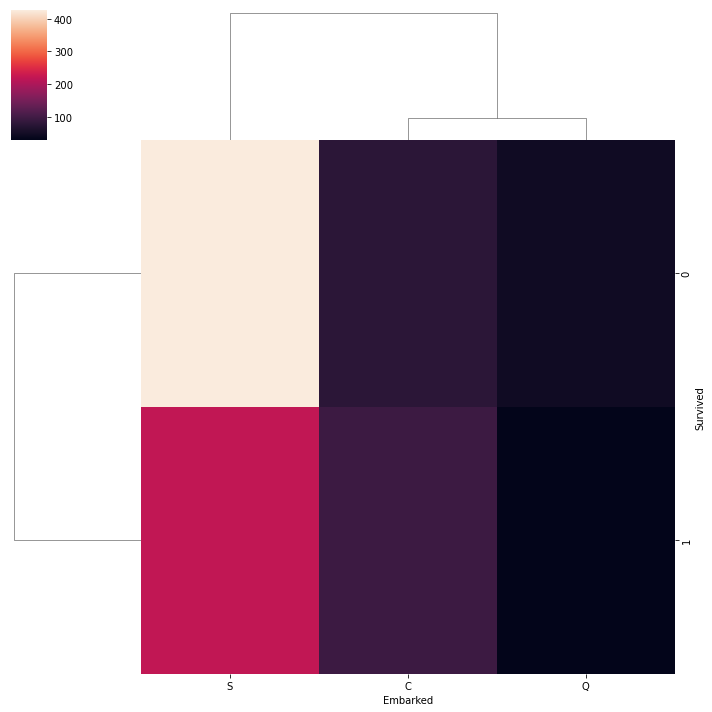

In [81]:
sns.clustermap(table)

Survived and Parch

In [82]:
f = pd.crosstab(titanic['Survived'], titanic['Parch'])
f

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


<AxesSubplot:xlabel='Survived'>

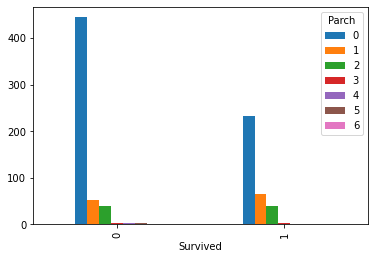

In [83]:
f.plot(kind='bar')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

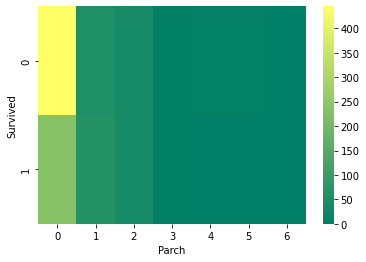

In [84]:
sns.heatmap(f, cmap='summer')

Pclass and Embarked

In [85]:
e = pd.crosstab(titanic['Pclass'], titanic['Embarked'])
e

Embarked,C,Q,S
Pclass,,,
1,85,2,129
2,17,3,164
3,66,72,353


<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

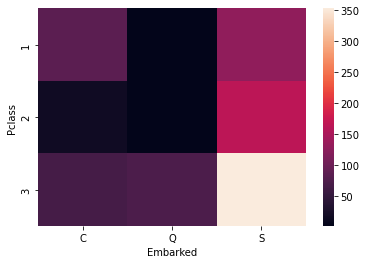

In [86]:
sns.heatmap(e)

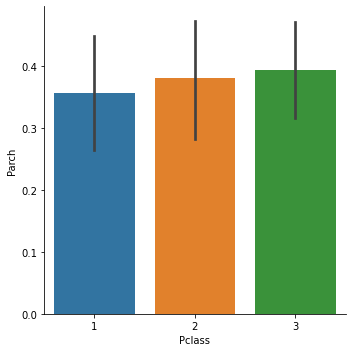

In [104]:
sns.catplot(x='Pclass', y='Parch', kind='bar', data=titanic)

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

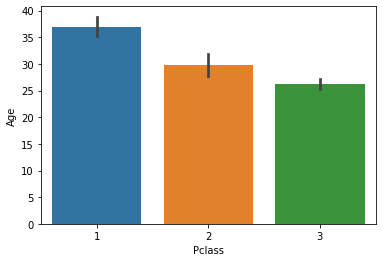

In [105]:
sns.barplot(titanic['Pclass'], titanic['Age'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

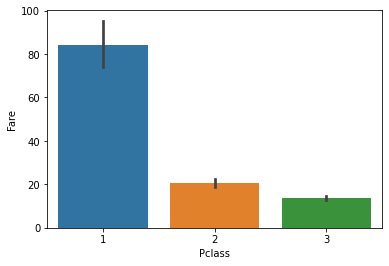

In [106]:
sns.barplot(titanic['Pclass'], titanic['Fare'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

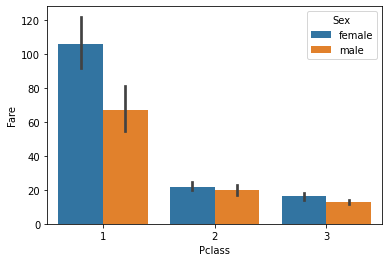

In [107]:
sns.barplot(titanic['Pclass'], titanic['Fare'], hue=titanic['Sex'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

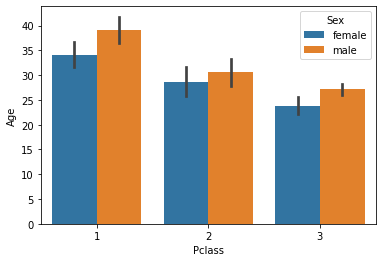

In [108]:
sns.barplot(titanic['Pclass'], titanic['Age'], hue=titanic['Sex'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

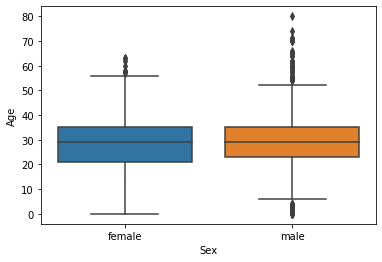

In [109]:
sns.boxplot(titanic['Sex'], titanic['Age'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

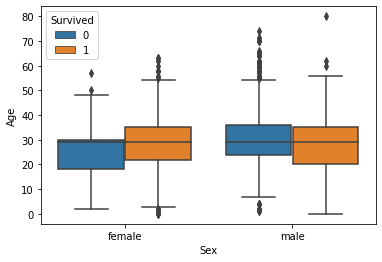

In [111]:
sns.boxplot(titanic['Sex'], titanic['Age'], hue=titanic['Survived'])

# CONCLUSION ON MULTIVARIATE ANALYSIS

1. The people age in range 18 to 35 could not survived in which 
    mean age is 30 which means it is the deadliest.
2. The people age in range 18 to 40 had survived in which mean age 
    is 28. 
3. The survival rate in Pclass is following:
    Pclass_1 > Pclass_2 > Pclass_3
4. The number of people who survived are:
    In 'Pclass_1':
        136
    In 'Pclass_2':
        87
    In 'Pclass_3':
        119
5. People in Pclass_3 are the deadliest.
6. The number of people who did not survived are:
    In 'Pclass_1':
        80
    In 'Pclass_2':
        97
    In 'Pclass_3':
        372        
7. The more people were travelling in Pclass_3, maybe because it 
    was cheaper.
8. The female survival rate is higher than male:
    a. Out of 577 male, only 109 (18.8%) survived and 468 (81.1%) 
    were dead.
    b. Out of 314 female, 233 (74.2%) survived and 81 (25.7%) were 
    dead.
9. The higher number of (427) people were dead that are embarked 
    from Southempton(S) and 219 people were survived.
10. The number of (75) people were dead that are embarked 
    from Cherbourg(C) and 93 people were survived.     
11. The number of (47) people were dead that are embarked 
    from Queenstown(Q) and 30 people were survived.
    Survival according to Embarked (S > C > Q)
12. The people who were travelling alone has a higher chance of 
    survival 
13. The people who were travelling with small family has a higher 
    chance of survival as comapred to the people travelling with
    bigger families.
14. In Pclass_1:
        a - 129 people were embarked from Southempton(S)
        b - 85 people were embarked from Cherbourg(C)
        c - 2 people were from Queenstown(Q)
15. In Pclass_2:
        a - 164 people were embarked from Southempton(S)
        b - 17 people were embarked from Cherbourg(C)
        c - 3 people were from Queenstown(Q)
16. In Pclass_3:
        a - 353 people were embarked from Southempton(S)
        b - 66 people were embarked from Cherbourg(C)
        c - 72 people were from Queenstown(Q)
17. The people in Pclass_3 are mostly travelling with big 
    families. 
18. Young population were travelling in Pclass_3   
19. Fares according to Pclass are:
        Pclass_1 > Pclass_2 > Pclass_3
20. Fares are higher in Pclass_1.
21. Fares are cheaper in Pclass_3.
22. Fares are higher for female on average.
23. male's age was higher than female in each Pclass on an average.
24. There is outlier in male and female age.
25. Older Female's survived are less than the young female's survived.
26. Older male's survived are higher than the young male's survived.
